In [1]:
import flatanalysis
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

   INFO:2020-08-11 15:53:00:__init__:31 Using tqdm notebook


In [2]:
import imp
imp.reload(flatanalysis)
imp.reload(flatanalysis.samples)
imp.reload(flatanalysis.dataset)
imp.reload(flatanalysis.roccurve)

   INFO:2020-08-11 15:53:02:__init__:7 Logger datasets is already defined
   INFO:2020-08-11 15:53:02:__init__:31 Using tqdm notebook


<module 'flatanalysis.roccurve' from '/uscms_data/d3/klijnsma/semivis/flatntuplestudies/v0/flatanalysis/flatanalysis/roccurve.py'>

## Load samples

In [3]:
# For development - small number of events
# signals = flatanalysis.samples.init_sigs_ht1000()
# bkgs = flatanalysis.samples.init_bkgs_limited()

# For intermediate results - more events but not all
signals = flatanalysis.samples.init_sigs_ht1000(max_entries=1e9)
bkgs = flatanalysis.samples.init_bkgs(max_entries=10000)

   INFO:2020-08-11 15:53:03:dataset:129 Cached ~3.2 Mb (4258 entries, 6 branches) for <flatanalysis.dataset.SignalDataset mz150 (4 root files) object at 0x7f9d8f126128>
   INFO:2020-08-11 15:53:04:dataset:129 Cached ~7.3 Mb (9513 entries, 6 branches) for <flatanalysis.dataset.SignalDataset mz250 (4 root files) object at 0x7f9d7ff12908>
   INFO:2020-08-11 15:53:05:dataset:129 Cached ~4.2 Mb (5554 entries, 6 branches) for <flatanalysis.dataset.SignalDataset mz450 (4 root files) object at 0x7f9d7f943400>
   INFO:2020-08-11 15:53:07:dataset:129 Cached ~12.6 Mb (16536 entries, 6 branches) for <flatanalysis.dataset.SignalDataset mz650 (4 root files) object at 0x7f9d7f910f60>
   INFO:2020-08-11 15:53:11:dataset:129 Cached ~21.9 Mb (10000 entries, 6 branches) for <flatanalysis.dataset.BackgroundDataset ttjets (50 root files) object at 0x7f9dcc06f470>
   INFO:2020-08-11 15:53:15:dataset:129 Cached ~29.7 Mb (10000 entries, 6 branches) for <flatanalysis.dataset.BackgroundDataset ttjets (50 root f

In [4]:
ttjets = [ b for b in bkgs if b.get_category()=='ttjets' ]
qcd = [ b for b in bkgs if b.get_category()=='qcd' ]
wjets = [ b for b in bkgs if b.get_category()=='wjets' ]
zjets = [ b for b in bkgs if b.get_category()=='zjets' ]

test_arrays object for checking things quickly:

In [18]:
for test_arrays in signals[0].iterate():
    break
for i in test_arrays.keys():
    print(i)

b'JetsAK15'
b'JetsAK15_softDropMass'
b'TriggerPass'
b'MET'
b'METPhi'
b'HT'
b'JetsAK15_leading'
b'JetsAK15_subleading'
b'JetsAK15_leading_softDropMass'
b'JetsAK15_subleading_softDropMass'
b'JetsAK15_closest'
b'JetsAK15_subclosest'
b'JetsAK15_closest_softDropMass'
b'JetsAK15_subclosest_softDropMass'
b'JetsAK15_MT'
b'JetsAK15_RT'
b'JetsAK15_leading_MT'
b'JetsAK15_leading_RT'
b'JetsAK15_subleading_MT'
b'JetsAK15_subleading_RT'
b'JetsAK15_closest_MT'
b'JetsAK15_closest_RT'
b'JetsAK15_subclosest_MT'
b'JetsAK15_subclosest_RT'


# Distributions

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(<matplotlib.axes._subplots.AxesSubplot at 0x7facc3eca748>,
 <Hist (met,label) instance at 0x7facc3e4fc18>)

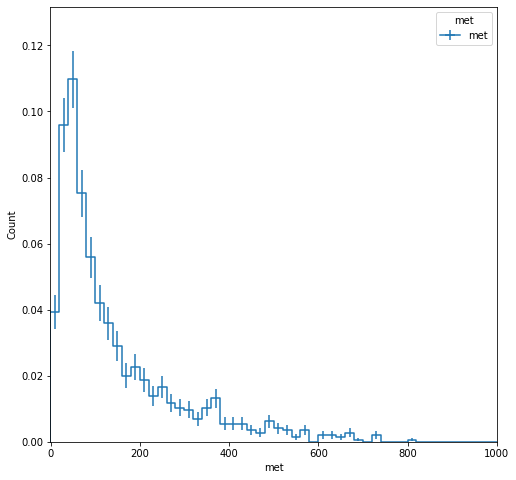

In [37]:
imp.reload(flatanalysis.roccurve)
flatanalysis.roccurve.plot_single_distribution(
    flatanalysis.iterate(signals[:1]), lambda arrays: arrays[b'MET'].flatten(),
    name='met',
    right=1000.
    )

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprec

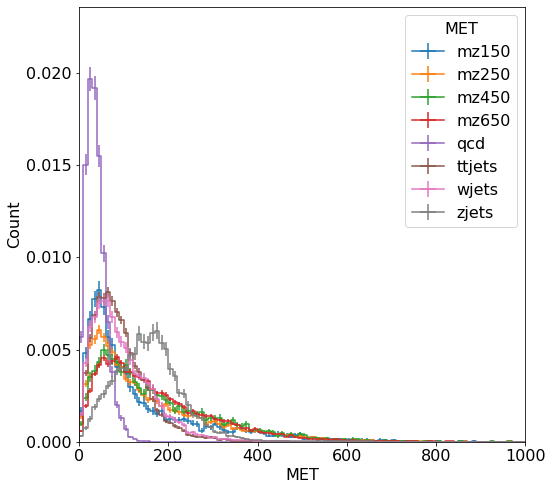

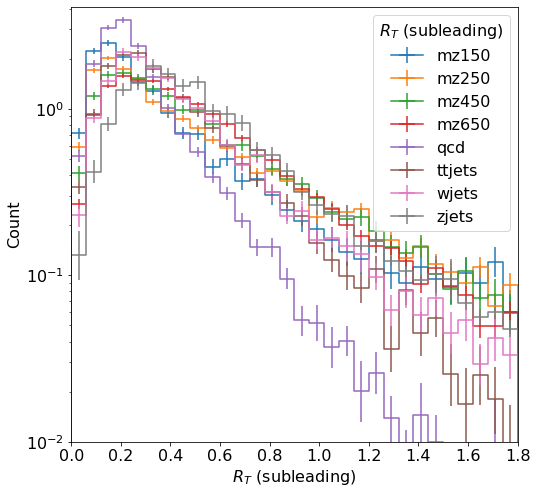

In [13]:
imp.reload(flatanalysis.roccurve)

to_plot = lambda: {
    'mz150' : flatanalysis.iterate(signals[:1]),
    'mz250' : flatanalysis.iterate(signals[1:2]),
    'mz450' : flatanalysis.iterate(signals[2:3]),
    'mz650' : flatanalysis.iterate(signals[3:4]),
#     'bkg' : flatanalysis.iterate(bkgs),
    'ttjets' : flatanalysis.iterate(ttjets),
    'qcd' : flatanalysis.iterate(qcd),
    'wjets' : flatanalysis.iterate(wjets),
    'zjets' : flatanalysis.iterate(zjets),
    }

flatanalysis.roccurve.plot_multiple_distributions(
    to_plot(),
    lambda arrays: arrays[b'MET'].flatten(),
    right=1000.,
    vartitle='MET',
    plot_options={'density':True}
    )

ax, hist = flatanalysis.roccurve.plot_multiple_distributions(
    to_plot(),
    lambda arrays: arrays[b'JetsAK15_subleading_RT'].flatten(),
    right=1.8, nbins=30,
    vartitle=r'$R_{T}$ (subleading)',
    plot_options={'density':True}
    )
ax.set_ylim(0.01)
ax.set_yscale('log')

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprec

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9d7f987470>,
 <Hist (somevar,label) instance at 0x7f9d7f144d68>)

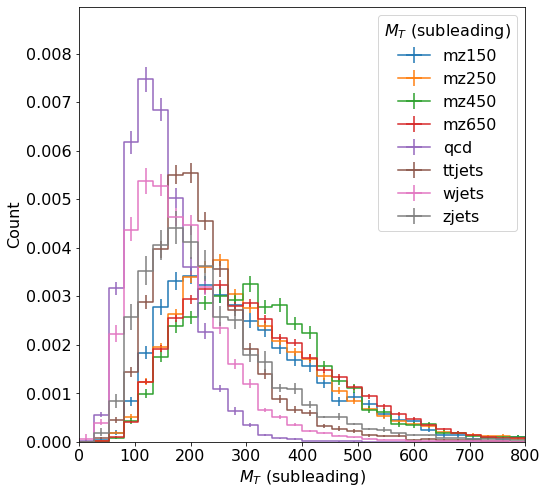

In [7]:
flatanalysis.roccurve.plot_multiple_distributions(
    to_plot(),
    lambda arrays: arrays[b'JetsAK15_subleading_MT'].flatten(),
    right=800., nbins=30,
    vartitle=r'$M_{T}$ (subleading)',
    plot_options={'density':True}
    )

## Define variables for which to compute roc curves

In [14]:
def msd_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_softDropMass'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_softDropMass'] > 0.0).any().sum()
    return n_pass, n_total
msd_cut_values = [ 0.0, 10., 30., 50., 70., 100., 150., 200., 500., 1e7 ]

def msd_leading_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_leading_softDropMass'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_leading_softDropMass'] > 0.0).any().sum()
    return n_pass, n_total
msd_leading_cut_values = [ 0.0, 10., 30., 50., 70., 100., 150., 200., 500., 1e7 ]

def msd_subleading_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_subleading_softDropMass'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_subleading_softDropMass'] > 0.0).any().sum()
    return n_pass, n_total
msd_subleading_cut_values = [ 0.0, 10., 30., 50., 70., 100., 150., 200., 500., 1e7 ]

def met_cut_function(arrays, cut):
    n_pass = (arrays[b'MET'] > cut).sum()
    n_total = (arrays[b'MET'] > 0.0).sum()
    return n_pass, n_total
met_cut_values = [ 0.0, 1.0, 10., 20., 40., 60., 80., 100., 150., 200., 500., 1000, 2000., 1e7 ]

def dphimet_cut_function(arrays, cut):
    from math import pi
    n_total = arrays[b'JetsAK15_closest'].shape[0]
    dphi = np.abs(arrays[b'JetsAK15_closest'].phi - arrays[b'METPhi'])
    dphi[dphi > 2.*pi] = dphi[dphi > 2.*pi] - 2.*pi  # Whole circles subtracted
    dphi[dphi > pi] = 2.*pi - dphi[dphi > pi]  # Pick the smaller angle
    selection = (dphi < cut)
    n_pass = selection.flatten().sum()
    return n_pass, n_total
dphimet_cut_values = [ 0.0, 0.5, 0.8, 1.0, 1.5, 2.5, 100.]

def deltaeta_cut_function(arrays, cut):
    n_total = arrays[b'JetsAK15_subleading'].counts.sum()
    # Only get the leading jets for when there is a subleading jet too
    leading_jets = arrays[b'JetsAK15_leading'][arrays[b'JetsAK15_subleading'].counts > 0].flatten()
    subleading_jets = arrays[b'JetsAK15_subleading'].flatten()
    deta = np.abs(leading_jets.eta - subleading_jets.eta)
    n_pass = (deta < cut).sum()
    return n_pass, n_total
deltaeta_cut_values = [ 0.0, 0.15, 0.30, 0.50, 1.0, 1.5, 2.0, 3.0, 10.]

In [15]:
def mt_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_MT'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_MT'] > 0.0).any().sum()
    return n_pass, n_total
mt_cut_values = [ 0.0, 300., 500., 600., 700., 800., 1e7 ]

def mt_leading_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_leading_MT'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_leading_MT'] > 0.0).any().sum()
    return n_pass, n_total
mt_leading_cut_values = [ 0.0, 300., 500., 600., 700., 800., 1e7 ]

def mt_subleading_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_subleading_MT'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_subleading_MT'] > 0.0).any().sum()
    return n_pass, n_total
mt_subleading_cut_values = [ 0.0, 300., 500., 600., 700., 800., 1e7 ]

In [16]:
def rt_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_RT'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_RT'] > 0.0).any().sum()
    return n_pass, n_total
rt_cut_values = [ 0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 100. ]

def rt_leading_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_leading_RT'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_leading_RT'] > 0.0).any().sum()
    return n_pass, n_total
rt_leading_cut_values = rt_cut_values

def rt_subleading_cut_function(arrays, cut):
    n_pass = (arrays[b'JetsAK15_subleading_RT'] > cut).any().sum()
    n_total = (arrays[b'JetsAK15_subleading_RT'] > 0.0).any().sum()
    return n_pass, n_total
rt_subleading_cut_values = rt_cut_values

## Plot roc curves

In [17]:
todo = [
#     (msd_cut_function, msd_cut_values),
#     (msd_leading_cut_function, msd_leading_cut_values),
#     (msd_subleading_cut_function, msd_subleading_cut_values),
#     (met_cut_function, met_cut_values),
#     (dphimet_cut_function, dphimet_cut_values),
#     (deltaeta_cut_function, deltaeta_cut_values),
#     (mt_cut_function, mt_cut_values),
#     (mt_leading_cut_function, mt_leading_cut_values),
#     (mt_subleading_cut_function, mt_subleading_cut_values),
#     (rt_cut_function, rt_cut_values),
#     (rt_leading_cut_function, rt_leading_cut_values),
    (rt_subleading_cut_function, rt_subleading_cut_values),
    ]

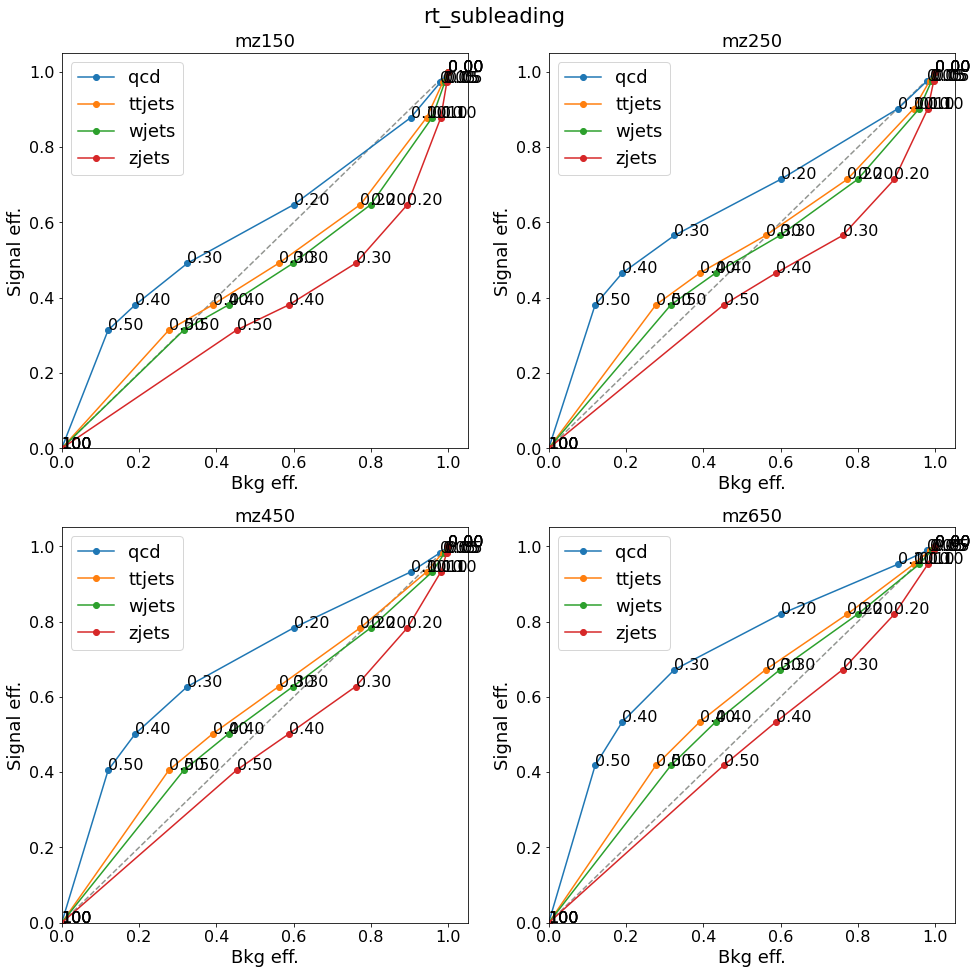

In [18]:
for cut_function, cut_values in todo:
    flatanalysis.roccurve.plot_multiple_signals_per_bkg(
        signals, bkgs,
        cut_function,
        cut_values,
        title = cut_function.__name__.replace('_cut_function', '')
        )